# Loan_status_prediction_Project

In [1]:
#import the required liabraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


### Load/ reading the data

In [3]:
data=pd.read_csv("loan_prediction.csv")
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
data.shape

(614, 13)

In [5]:
data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


## Information of the data

#### Independent variables

-Loan_ID: ID of the loan.

-Gender: Gender of a person.

-Married: weather a person is married or not.

-Dependents: weather the person have a dependent or not.

-Education: Edutional cirteria weather the person is graduate or not.

-Self_Employed: Weather the person is self Employeed or Not(must be Salaried)

-ApplicantIncome: Income of the applicant

-CoapplicantIncome: Income of the coapplicant

-LoanAmount: Amount of Loan given.

-Loan_Amount_Term: Time limit of the loan amount given.

-Credit_History: Credit history of applicant.

-Property_Area: type of area in which applicant's Property is located.
    
   #### Dependent variable

-Loan_Status: Approved or Not.

## Null values

In [9]:
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

<AxesSubplot:>

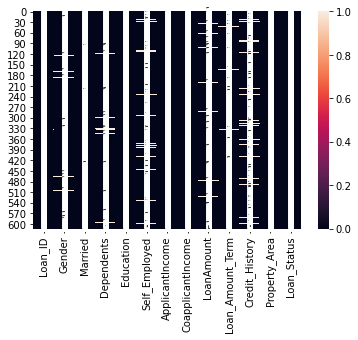

In [10]:
sns.heatmap(data.isnull(),annot=True)

Null values are present in the dataset , which we can treat or handle by filling it by mean or mode.

In [13]:
data_cat_nan=data[['Gender', 'Married', 'Dependents',  'Self_Employed']].copy()
data_cat_nan

,Gender,Married,Dependents,Self_Employed
0,Male,No,0,No
1,Male,Yes,1,No
2,Male,Yes,0,Yes
3,Male,Yes,0,No
4,Male,No,0,No
...,...,...,...,...
609,Female,No,0,No
610,Male,Yes,3+,No
611,Male,Yes,1,No
612,Male,Yes,2,No


In [16]:
from sklearn.impute import SimpleImputer

for i in data_cat_nan:
    imp= SimpleImputer(missing_values= np.nan, strategy="most_frequent")
    data[i]= imp.fit_transform(data[i].values.reshape(-1,1))

In [17]:
# filling the loan amount
data["LoanAmount"].fillna(data["LoanAmount"].median(), inplace=True)

In [18]:
#filling the loan amount turn
data["Loan_Amount_Term"].fillna(data["Loan_Amount_Term"].mean(), inplace=True)

In [19]:
data['Credit_History'].unique()

array([ 1.,  0., nan])

As there are only two types of person so it is moreover like category column, so we can fill the null values with mode.

In [29]:
data['Credit_History'].mode()

0    1.0
dtype: float64

In [34]:
data["Credit_History"].fillna(1.0, inplace=True)

In [35]:
data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

Now, there is no null values present in the dataset , so we can proceed further for EDA. 

# EDA/ Feature Engineering

In [37]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,145.752443,342.000000,0.855049
std,6109.041673,2926.248369,84.107233,64.372489,0.352339
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,3812.500000,1188.500000,128.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


Skewness is present there as SD is very high in some columns , and outliers also .

array([[<AxesSubplot:title={'center':'ApplicantIncome'}>,
        <AxesSubplot:title={'center':'CoapplicantIncome'}>],
       [<AxesSubplot:title={'center':'LoanAmount'}>,
        <AxesSubplot:title={'center':'Loan_Amount_Term'}>],
       [<AxesSubplot:title={'center':'Credit_History'}>, <AxesSubplot:>]],
      dtype=object)

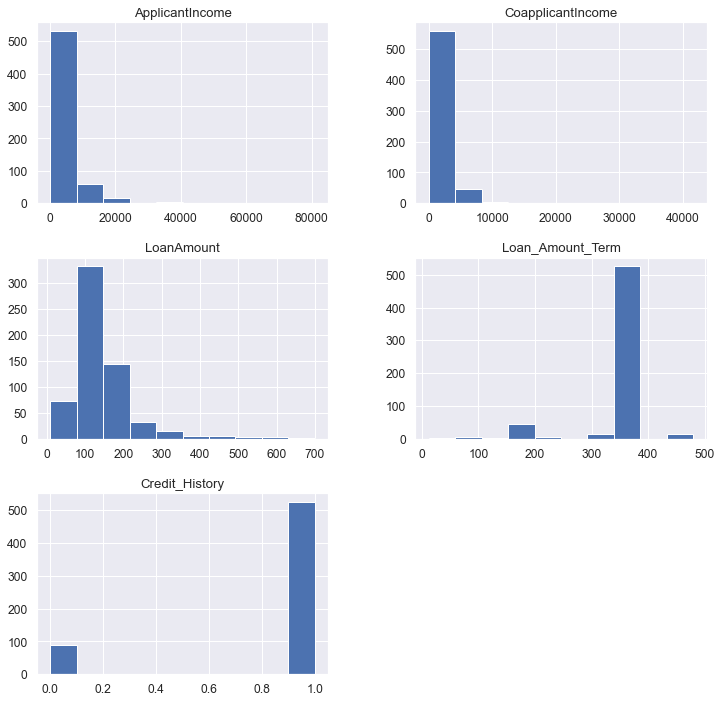

In [38]:
sns.set(style="darkgrid", palette='deep', font_scale=1.1)
data.hist(figsize=(12,12))

Data is skewed as we can see from above graphs.

### Lets Check our Categorical and Numerical Features.

In [39]:
data.drop(['Loan_ID'],axis=1,inplace=True)

In [40]:
data.columns.to_series().groupby(data.dtypes).groups

{int64: ['ApplicantIncome'], float64: ['CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History'], object: ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']}

In [41]:
data_int=data[['ApplicantIncome','CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term',
        'Credit_History']].copy()

In [42]:
data_cat=data[['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
        'Property_Area', 'Loan_Status']].copy()

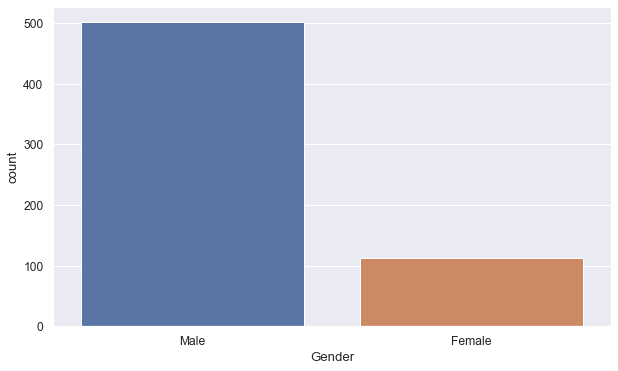

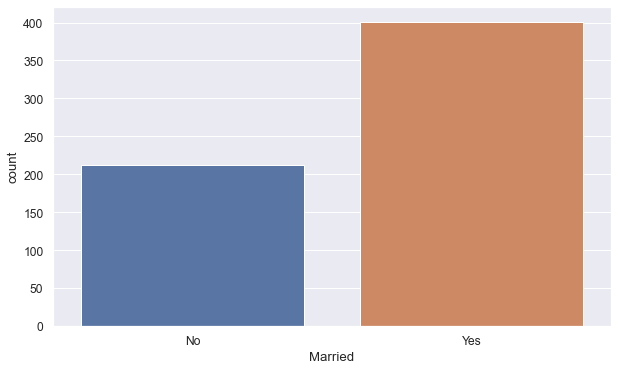

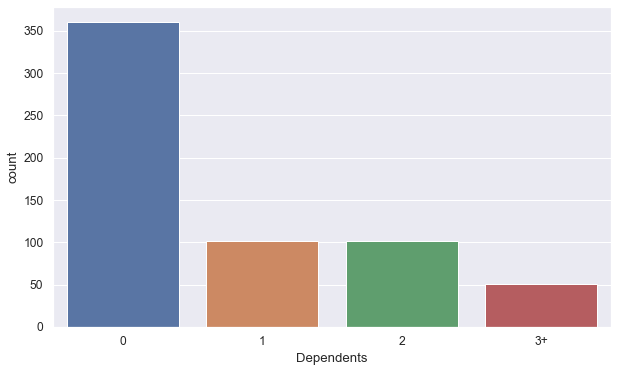

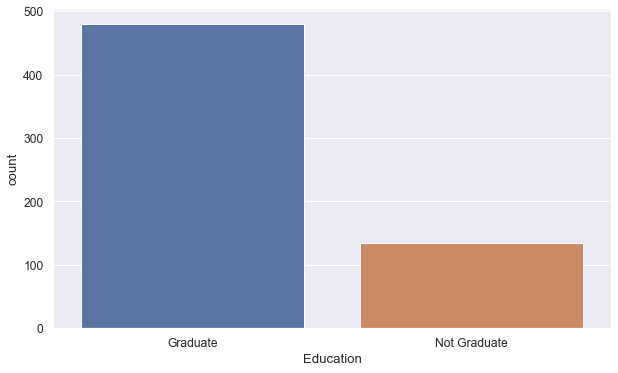

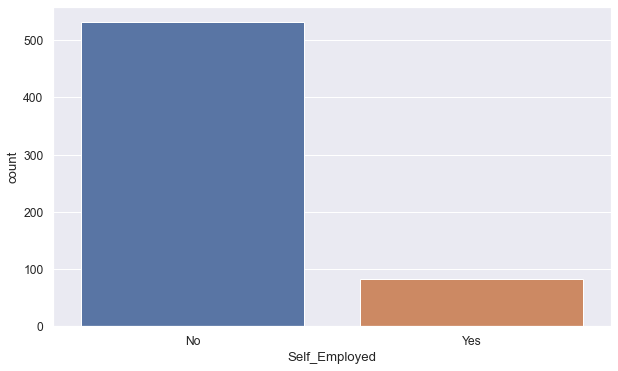

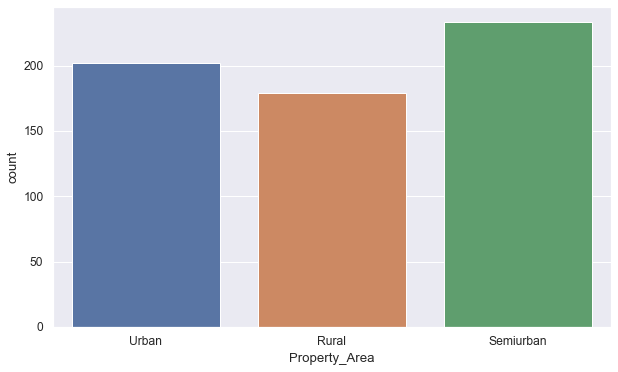

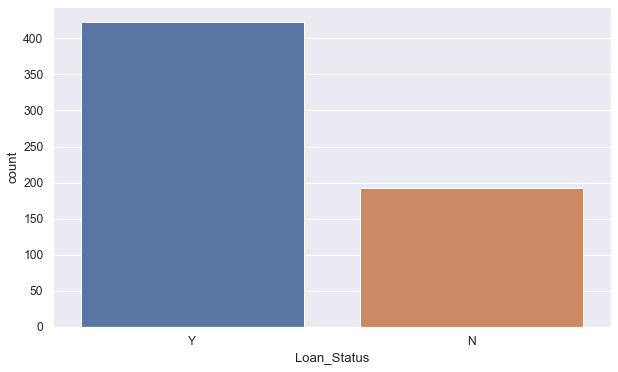

In [44]:
for feature in data_cat:
        plt.figure(figsize=(10,20))
        plt.subplot(311)
        sns.countplot(data[feature])

From the above set of graphs we can see that most of the applicants are Male, most of the applicants are Graduate, most of the applicants are Married, most of the applicants have no dependents, most of the applicants are not self employed, most of the applicants are from semi urban region.

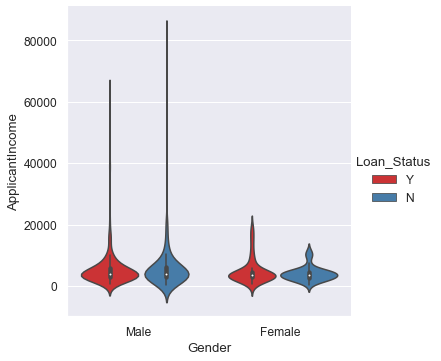

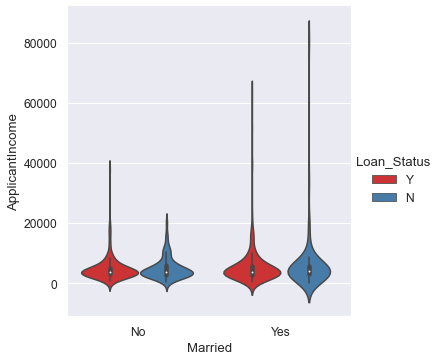

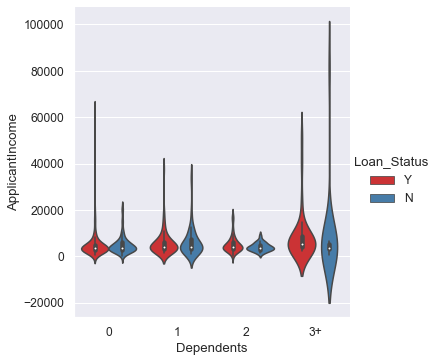

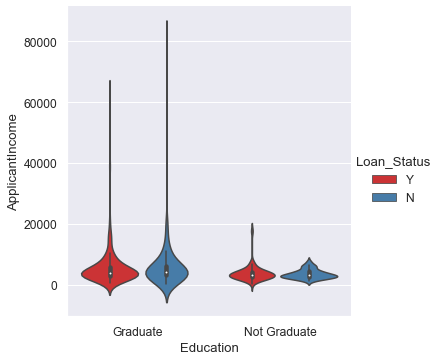

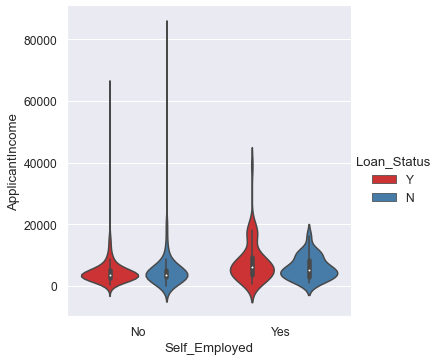

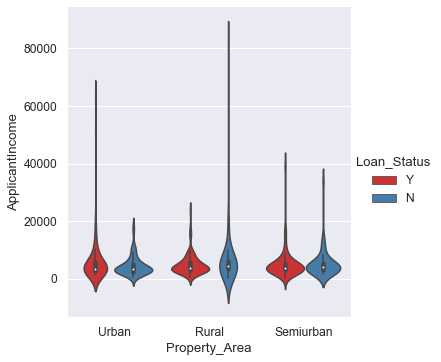

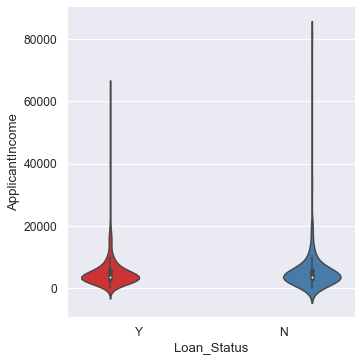

In [50]:
for i in data_cat:
    sns.catplot(x=i, y="ApplicantIncome",hue='Loan_Status',data=data,kind='violin', palette='Set1')

From the above sets of graph we can see that the males have silghtly higher chances of Loan approval, and Married people also have high chances for approval as total income is high compare to unmarried applicant,most of gradutaes have loan approvals althouth people with high income has loan status as no, might be because of credit score and as most of properties of applicants with high income are from rural areas.

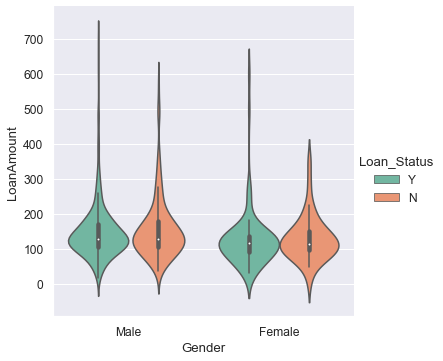

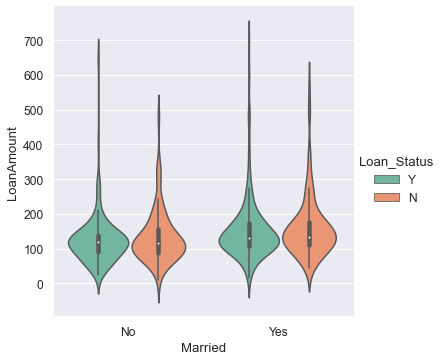

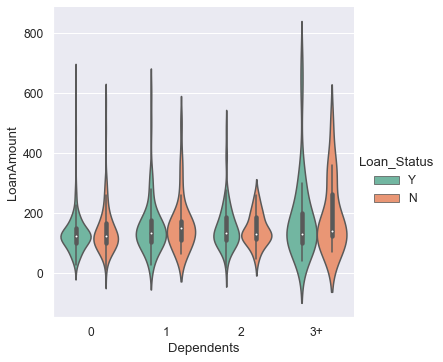

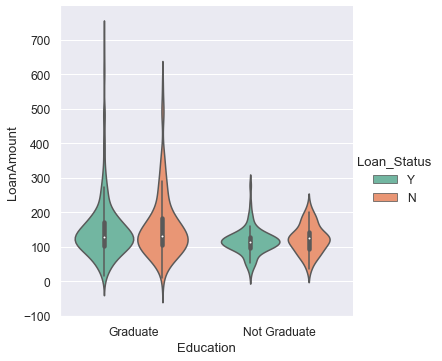

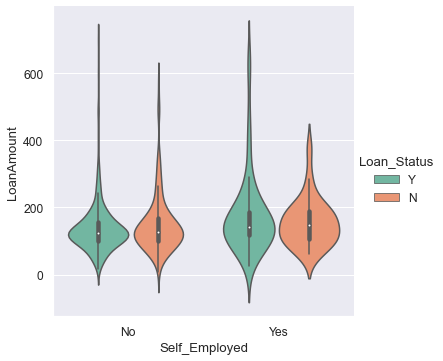

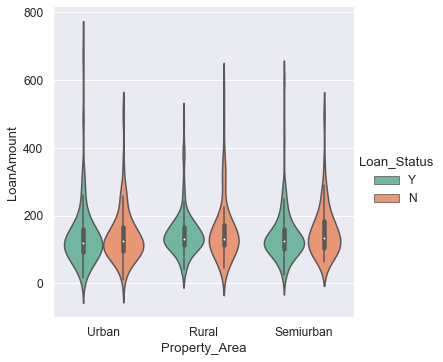

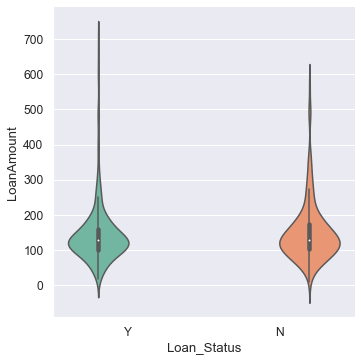

In [52]:
for d in data_cat:
    sns.catplot(x=d,y='LoanAmount',hue='Loan_Status',data=data,kind='violin',palette='Set2')

From the above sets of graph we can see that males have got loan approval for more than 200, and most of married applicants were approved for more than 200, most of graduates have got loan approval for more than 200, most of the applicants who got more than 200 are self employed might have own buissness, urban areas people have highest loan amount.

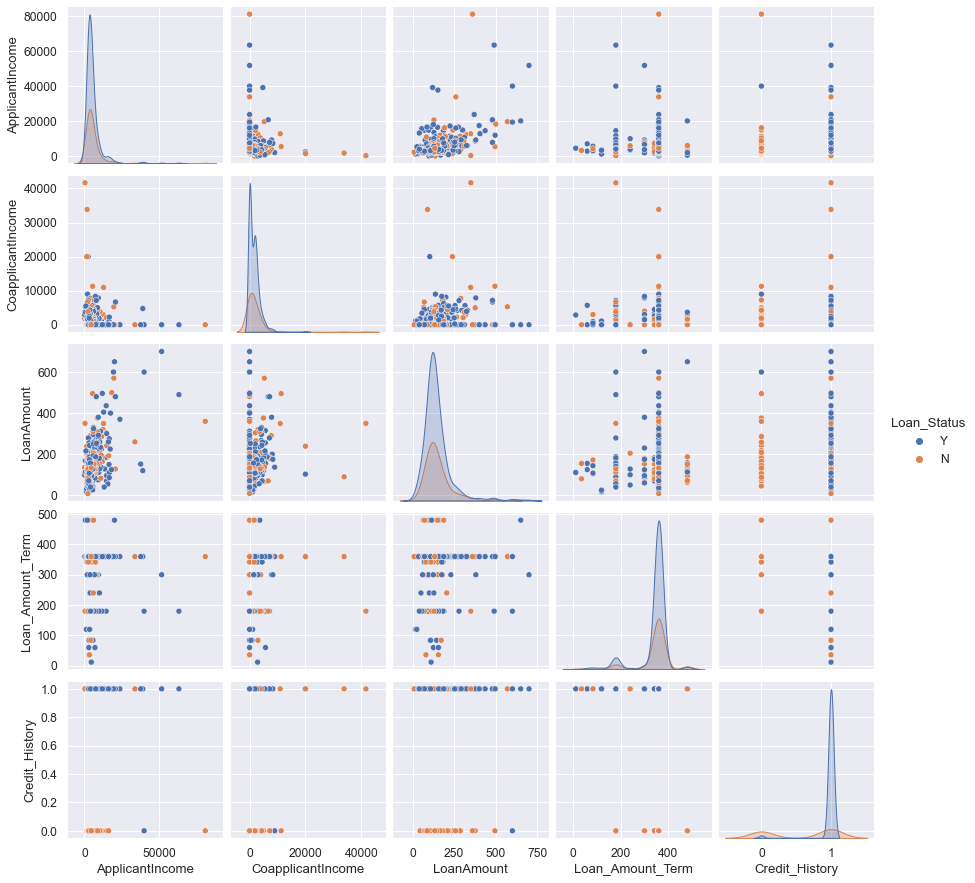

In [54]:
sns.pairplot(data,hue='Loan_Status')

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

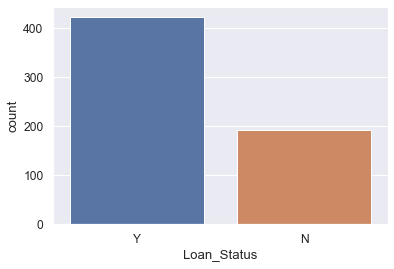

In [56]:
sns.countplot(data['Loan_Status'])

There are more loans approved than rejected .

## Label Encoding

In [68]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data['Married']=le.fit_transform(data['Married'])
data['Gender']=le.fit_transform(data['Gender'])
data['Education']=le.fit_transform(data['Education'])
data['Self_Employed']=le.fit_transform(data['Self_Employed'])
data['Loan_Status']=le.fit_transform(data['Loan_Status'])
data['Property_Area']=le.fit_transform(data['Property_Area'])
data['Dependents'] =pd.get_dummies(data['Dependents'], drop_first=True)

In [65]:
data

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,2900,0.0,71.0,360.0,1.0,0,1
610,1,1,3+,0,0,4106,0.0,40.0,180.0,1.0,0,1
611,1,1,1,0,0,8072,240.0,253.0,360.0,1.0,2,1
612,1,1,2,0,0,7583,0.0,187.0,360.0,1.0,2,1


In [59]:
#Correlation 

data_corr= data.corr()
data_corr

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Gender,1.000000,0.364569,0.045364,-0.000525,0.058809,0.082912,0.106904,-0.073567,0.009170,-0.025752,0.017987
Married,0.364569,1.000000,0.012304,0.004489,0.051708,0.075948,0.146546,-0.100863,0.010938,0.004257,0.091478
Education,0.045364,0.012304,1.000000,-0.010383,-0.140760,-0.062290,-0.168759,-0.077242,-0.073658,-0.065243,-0.085884
Self_Employed,-0.000525,0.004489,-0.010383,1.000000,0.127180,-0.016100,0.115100,-0.033943,-0.001550,-0.030860,-0.003700
ApplicantIncome,0.058809,0.051708,-0.140760,0.127180,1.000000,-0.116605,0.565181,-0.045242,-0.018615,-0.009500,-0.004710
CoapplicantIncome,0.082912,0.075948,-0.062290,-0.016100,-0.116605,1.000000,0.189218,-0.059675,0.011134,0.010522,-0.059187
LoanAmount,0.106904,0.146546,-0.168759,0.115100,0.565181,0.189218,1.000000,0.039235,-0.000607,-0.046632,-0.033214
Loan_Amount_Term,-0.073567,-0.100863,-0.077242,-0.033943,-0.045242,-0.059675,0.039235,1.000000,0.000432,-0.077620,-0.020974
Credit_History,0.009170,0.010938,-0.073658,-0.001550,-0.018615,0.011134,-0.000607,0.000432,1.000000,0.001963,0.540556
Property_Area,-0.025752,0.004257,-0.065243,-0.030860,-0.009500,0.010522,-0.046632,-0.077620,0.001963,1.000000,0.032112


<AxesSubplot:>

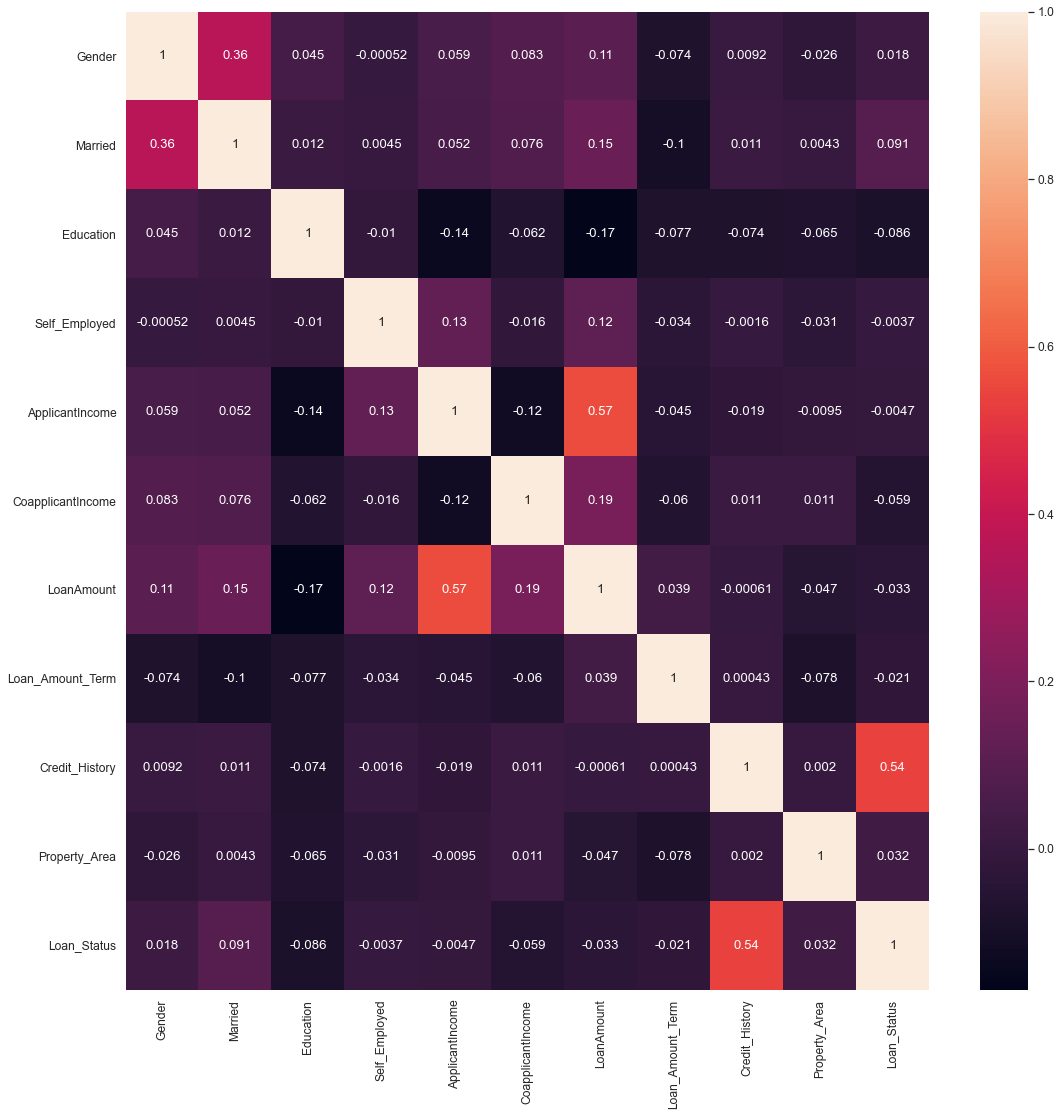

In [61]:
plt.figure(figsize=(18,18))
sns.heatmap(data_corr, annot= True)

credir history is impacting the loan_status more , or having positive correlation, loan amount and applicant income is also positive correlated.

## Skewness

In [63]:
data.skew()

Gender              -1.648795
Married             -0.644850
Education            1.367622
Self_Employed        2.159796
ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.743053
Loan_Amount_Term    -2.389680
Credit_History      -2.021971
Property_Area       -0.066196
Loan_Status         -0.809998
dtype: float64

In [69]:
#with log tranform method

for cols in data.columns:
    if data.skew().loc[cols] > 0.5:
        data[cols] = np.log1p(data[cols])

In [70]:
data.skew()

Gender              -1.648795
Married             -0.644850
Dependents           1.798828
Education            1.367622
Self_Employed        2.159796
ApplicantIncome      0.482128
CoapplicantIncome   -0.173073
LoanAmount          -0.151578
Loan_Amount_Term    -2.389680
Credit_History      -2.021971
Property_Area       -0.066196
Loan_Status         -0.809998
dtype: float64

## Outliers

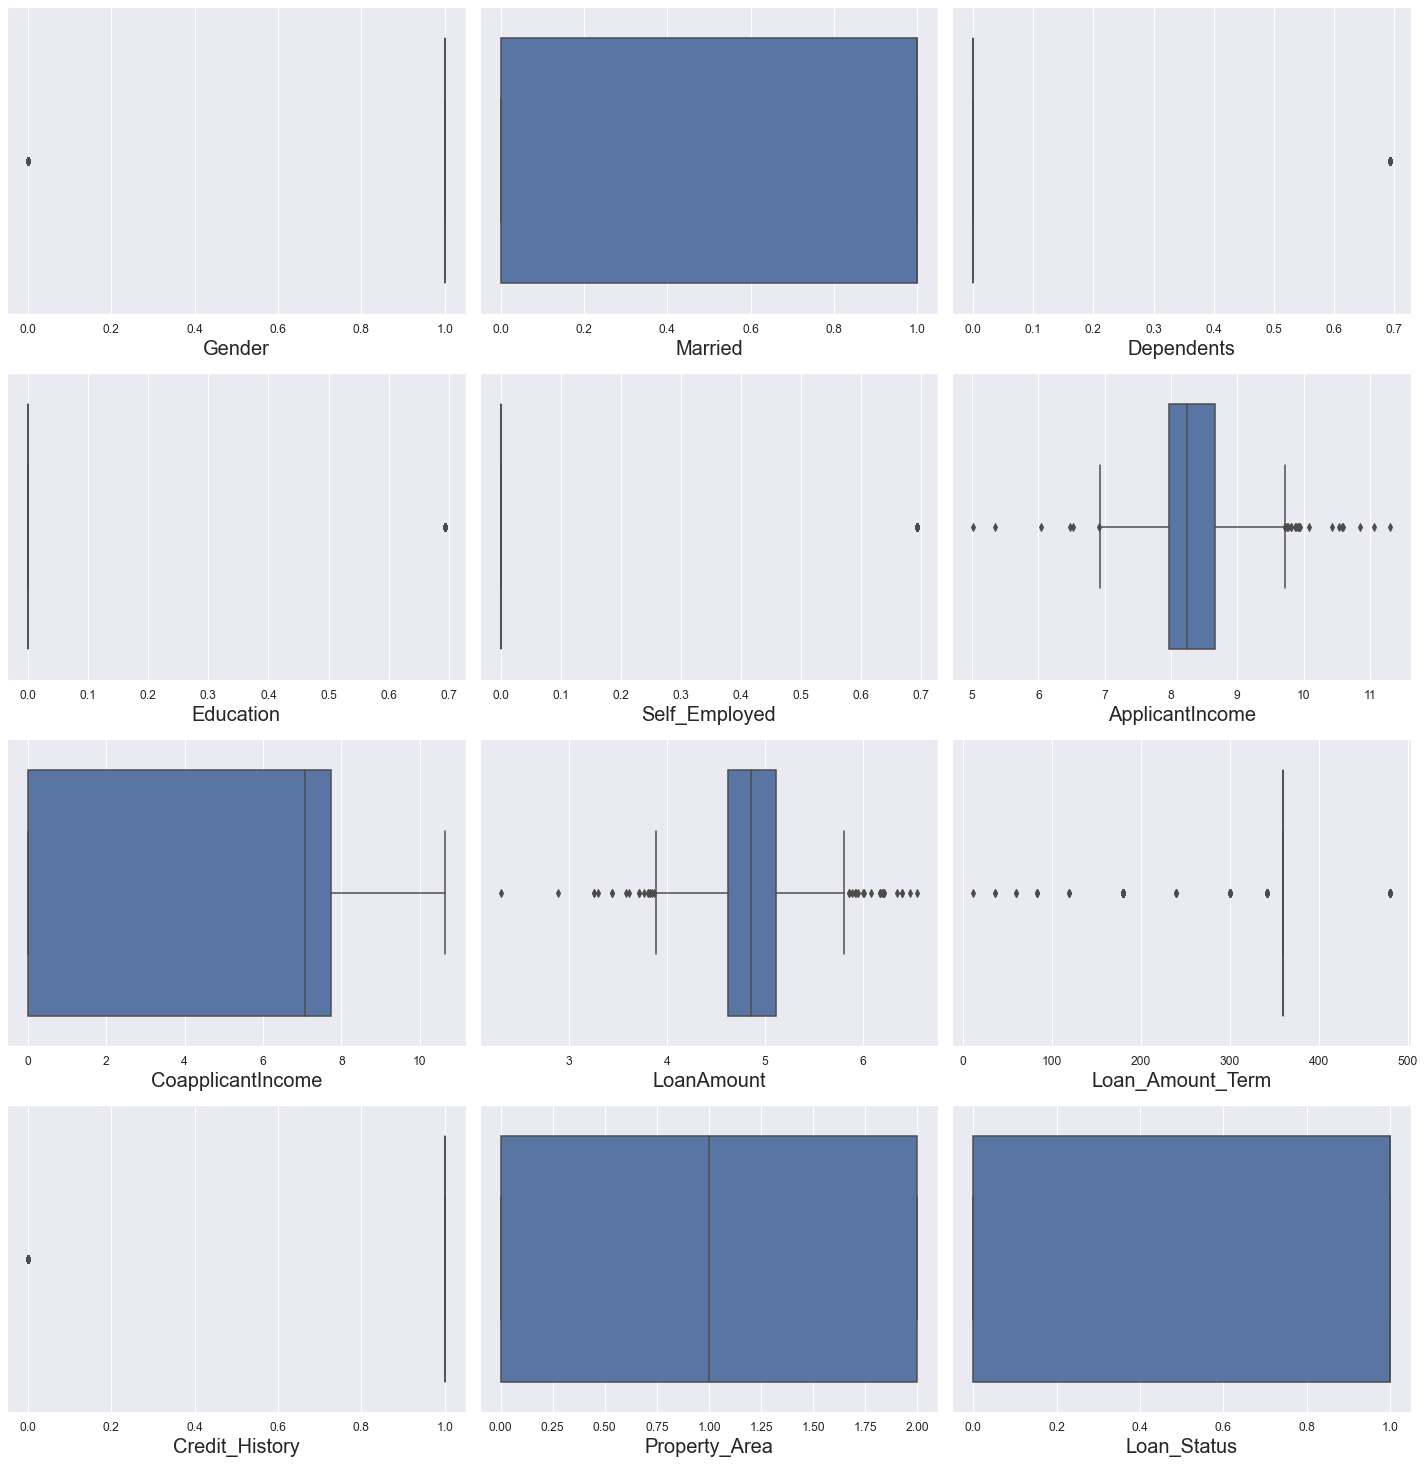

In [72]:
#lets check for outliers using box plot
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1
for column in data:
    if plotnumber<=14:
        ax=plt.subplot(5,3,plotnumber)
        sns.boxplot(data[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

In [76]:
from scipy.stats import zscore
zscore = abs(zscore(data))
df = data.loc[(zscore<3).all(axis = 1)]
print(data.shape)
print("After removing outliers",df.shape)

(614, 12)
After removing outliers (587, 12)


## Splitting and scaling of data

In [77]:
x=df.iloc[:,:-1]
x.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,0,0.000000,0.000000,0.000000,8.674197,0.000000,4.859812,360.0,1.0,2
1,1,1,0.693359,0.000000,0.000000,8.430327,7.319202,4.859812,360.0,1.0,0
2,1,1,0.000000,0.000000,0.693147,8.006701,0.000000,4.204693,360.0,1.0,2
3,1,1,0.000000,0.693147,0.000000,7.857094,7.765993,4.795791,360.0,1.0,2
4,1,0,0.000000,0.000000,0.000000,8.699681,0.000000,4.955827,360.0,1.0,2


In [78]:
y=df['Loan_Status']
y.head()

0    1
1    0
2    1
3    1
4    1
Name: Loan_Status, dtype: int64

In [79]:
#Applying the standard scaling on the data
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)
x

array([[ 0.46944033, -1.36506946, -0.43941942, ...,  0.23724412,
         0.41713307,  1.22851481],
       [ 0.46944033,  0.73256345,  2.27573007, ...,  0.23724412,
         0.41713307, -1.30624158],
       [ 0.46944033,  0.73256345, -0.43941942, ...,  0.23724412,
         0.41713307,  1.22851481],
       ...,
       [ 0.46944033,  0.73256345,  2.27573007, ...,  0.23724412,
         0.41713307,  1.22851481],
       [ 0.46944033,  0.73256345, -0.43941942, ...,  0.23724412,
         0.41713307,  1.22851481],
       [-2.1301962 , -1.36506946, -0.43941942, ...,  0.23724412,
        -2.39731651, -0.03886339]])

## SMOTE

In [80]:
y.value_counts()

1    404
0    183
Name: Loan_Status, dtype: int64

In [81]:
#lets use oversampling technique on minority class using smote method
#import smote from imblearn
from imblearn.over_sampling import SMOTE
sm=SMOTE()
x_over,y_over=sm.fit_resample(x,y)
y_over.value_counts()

0    404
1    404
Name: Loan_Status, dtype: int64

In [82]:
#Splitting into train and test dataset

from sklearn.model_selection import train_test_split,cross_val_score
x_train,x_test,y_train,y_test=train_test_split(x_over,y_over,test_size=0.20,random_state=56)

In [83]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((646, 11), (162, 11), (646,), (162,))

# ML Alogrithms

In [91]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier,ExtraTreesClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_curve,auc, f1_score,mean_squared_error,mean_absolute_error
from sklearn.model_selection import cross_val_score, GridSearchCV

In [85]:
KNN=KNeighborsClassifier()
SV=SVC()
LR=LogisticRegression()
DT=DecisionTreeClassifier(random_state=56)
GNB=GaussianNB()
RFC=RandomForestClassifier(random_state=56)
GBC=GradientBoostingClassifier(random_state=56)
ABC=AdaBoostClassifier(random_state=56)
ETC=ExtraTreesClassifier(random_state=56)

In [86]:
models = []
models.append(('KNeighborsClassifier', KNN))
models.append(('SVC', SV))
models.append(('LogisticRegression', LR))
models.append(('DecisionTreeClassifier', DT))
models.append(('GaussianNB', GNB))
models.append(('RandomForestClassifier', RFC))
models.append(('GradientBoostingClassifier', GBC))
models.append(('ExtraTreesClassifier',ETC))
models.append(('AdaBoostClassifier',ABC))

---------------------> KNeighborsClassifier <----------------------


KNeighborsClassifier()


Accuracy_score =  0.7592592592592593


F1_score = 0.7547169811320754


Cross_Val_Score =  0.7400771604938272


roc_auc_score =  0.7592592592592592


classification_report
               precision    recall  f1-score   support

           0       0.75      0.78      0.76        81
           1       0.77      0.74      0.75        81

    accuracy                           0.76       162
   macro avg       0.76      0.76      0.76       162
weighted avg       0.76      0.76      0.76       162



[[63 18]
 [21 60]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)



---------------------> SVC <----------------------


SVC()


Accuracy_score =  0.7469135802469136


F1_score = 0.7783783783783783


Cross_Val_Score =  0.7450925925925925


roc_auc_score =  0.7469135802469136


classification_report
               precision    recall  f1-score   support

           0       0.84      0.60      0.71      

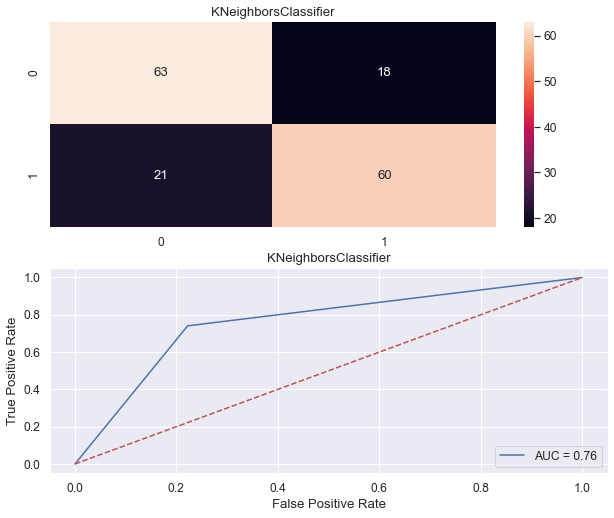

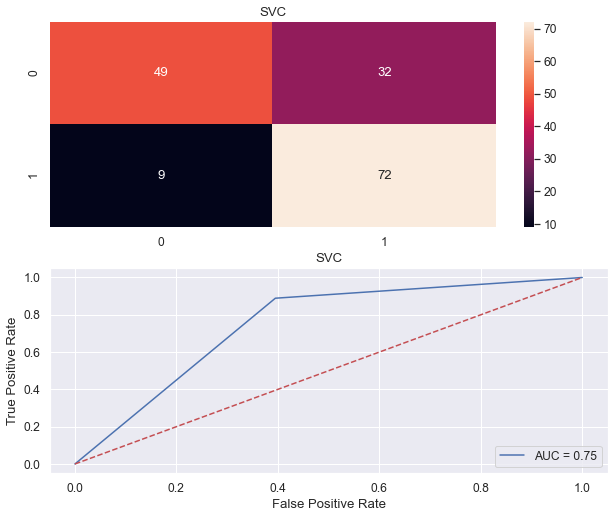

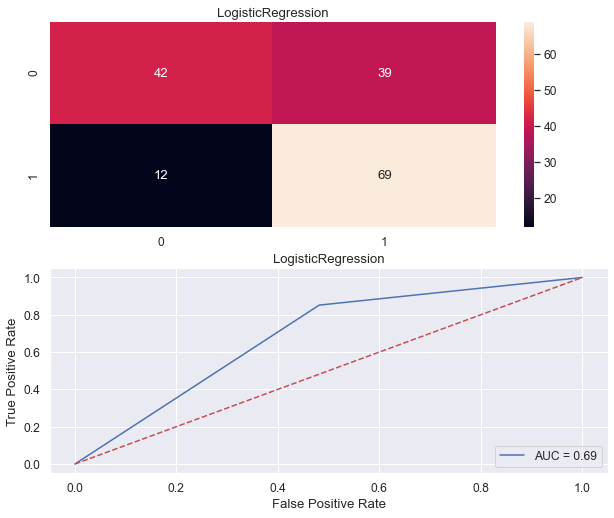

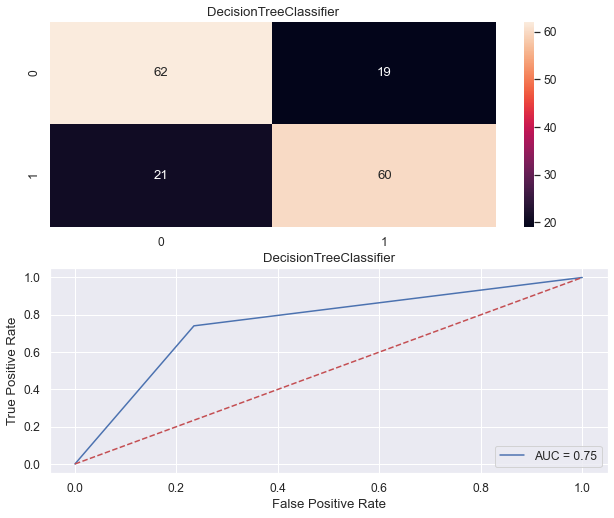

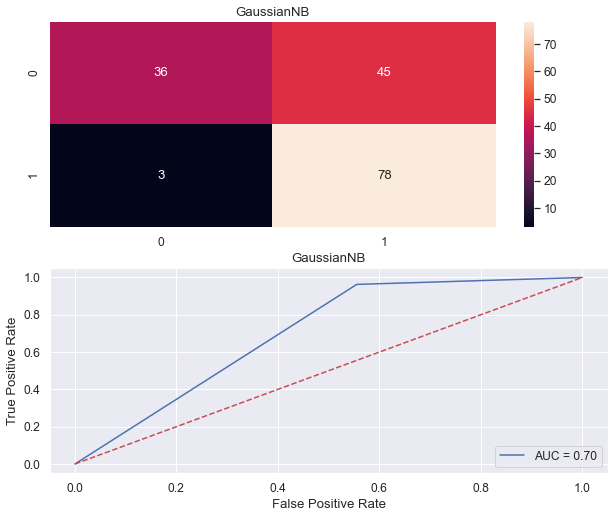

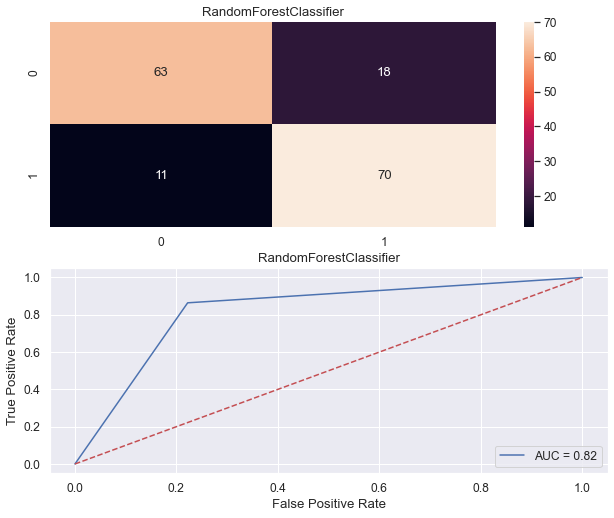

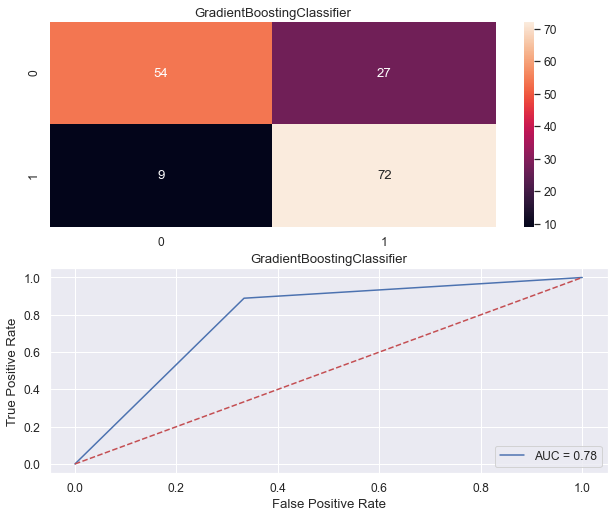

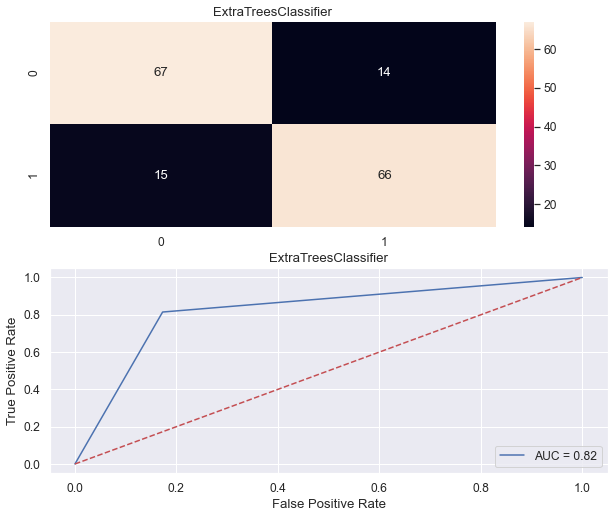

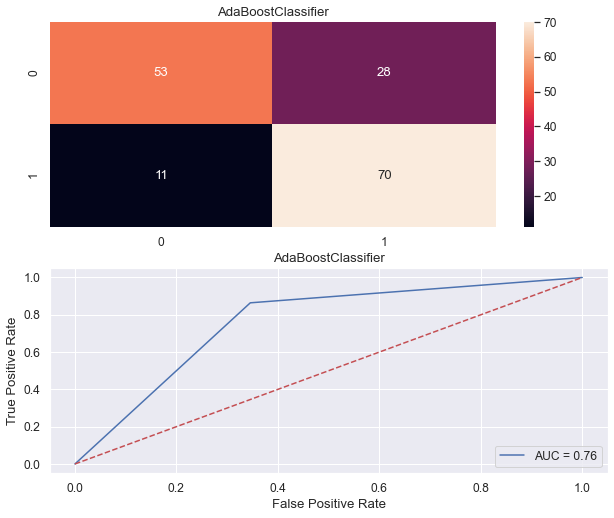

In [89]:
Model = []
score = []
F1_score=[]
cvs=[]
rocscore=[]
for name,model in models:
    print('--------------------->',name,'<----------------------')
    print('\n')
    Model.append(name)
    model.fit(x_train,y_train)
    print(model)
    pre=model.predict(x_test)
    print('\n')
    AS=accuracy_score(y_test,pre)
    print('Accuracy_score = ',AS)
    score.append(AS)
    print('\n')
    F1=f1_score(y_test,pre)
    print('F1_score =', F1)
    F1_score.append(F1)
    print('\n')
    sc = cross_val_score(model, x_over, y_over, cv=10, scoring='accuracy').mean()
    print('Cross_Val_Score = ',sc)
    cvs.append(sc)
    print('\n')
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,pre)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    print ('roc_auc_score = ',roc_auc)
    rocscore.append(roc_auc)
    print('\n')
    print('classification_report\n',classification_report(y_test,pre))
    print('\n')
    cm=confusion_matrix(y_test,pre)
    print(cm)
    print('\n')
    plt.figure(figsize=(10,40))
    plt.subplot(911)
    plt.title(name)
    print(sns.heatmap(cm,annot=True))
    plt.subplot(912)
    plt.title(name)
    plt.plot(false_positive_rate, true_positive_rate, label='AUC = %0.2f'% roc_auc)
    plt.plot([0,1],[0,1],'r--')
    plt.legend(loc='lower right')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    print('\n\n')


In [90]:
result = pd.DataFrame({'Model': Model, 'Accuracy_score': score , 'F1_score': F1_score , 'Cross_val_score':cvs,'Roc_auc_curve':rocscore})
result

,Model,Accuracy_score,F1_score,Cross_val_score,Roc_auc_curve
0,KNeighborsClassifier,0.759259,0.754717,0.740077,0.759259
1,SVC,0.746914,0.778378,0.745093,0.746914
2,LogisticRegression,0.685185,0.730159,0.710278,0.685185
3,DecisionTreeClassifier,0.753086,0.750000,0.767238,0.753086
4,GaussianNB,0.703704,0.764706,0.719043,0.703704
5,RandomForestClassifier,0.820988,0.828402,0.825602,0.820988
6,GradientBoostingClassifier,0.777778,0.800000,0.763719,0.777778
7,ExtraTreesClassifier,0.820988,0.819876,0.846651,0.820988
8,AdaBoostClassifier,0.759259,0.782123,0.752546,0.759259


Random forest classifier is working well with 82% accuracy and cv , f1 score, so we,ll select and try the hyper parameter tuning as well.

## Hyper Parameter tuning

In [92]:
params={"n_estimators":[20,40,80],"max_features":["auto", "log2"],"min_samples_split":[2,4,8],"bootstrap":[True, False],'max_depth':[5,10,15],'min_samples_leaf':np.arange(2,10)}


In [93]:
grid = GridSearchCV(RFC,param_grid=params,cv=5,n_jobs=-1)

In [94]:
grid.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=56), n_jobs=-1,
             param_grid={'bootstrap': [True, False], 'max_depth': [5, 10, 15],
                         'max_features': ['auto', 'log2'],
                         'min_samples_leaf': array([2, 3, 4, 5, 6, 7, 8, 9]),
                         'min_samples_split': [2, 4, 8],
                         'n_estimators': [20, 40, 80]})

In [95]:
grid.best_params_

{'bootstrap': False,
 'max_depth': 15,
 'max_features': 'auto',
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 20}

In [101]:
rf=RandomForestClassifier(bootstrap=False,max_depth=15,max_features='auto',min_samples_leaf=2,min_samples_split=2,n_estimators=20)
rf.fit(x_train,y_train)
rf.fit(x_train,y_train)
rf_pred = rf.predict(x_test)
print('Accuracy score' ,accuracy_score(rf_pred,y_test))
rf_cv=cross_val_score(rf,x,y,cv=5)
print('CV_Score', rf_cv.mean())

Accuracy score 0.8024691358024691
CV_Score 0.7854121396494277


As it is not giving us high than the previous one , so we'll go with previous RFC model.

# Saving the model

In [102]:
import joblib
joblib.dump(RFC,"loan_prediction.csv")

['loan_prediction.csv']

In [103]:
model=joblib.load("loan_prediction.csv")

### Conclusion

In [104]:
pred_= model.predict(x_test)
print("Prediction", pred_)
print("Actual", y_test)

Prediction [1 0 0 0 0 1 1 1 1 1 0 0 1 1 0 0 1 1 0 1 0 1 0 1 1 1 0 0 0 0 1 0 1 1 1 0 0
 1 1 1 0 0 1 1 0 0 0 0 0 0 0 1 1 1 1 1 0 1 0 0 1 1 1 0 1 0 1 0 1 1 1 1 1 1
 1 0 0 1 0 1 1 1 0 0 1 1 0 1 0 0 0 1 1 1 0 1 1 1 0 1 1 1 0 1 1 0 1 1 1 1 0
 1 0 1 0 0 0 0 1 1 0 1 1 1 0 1 0 1 1 1 0 1 1 0 0 0 0 1 1 0 1 0 0 0 0 0 1 1
 1 0 0 0 0 1 1 0 1 1 0 1 0 1]
Actual 294    1
629    0
771    0
703    0
60     1
      ..
537    1
512    0
234    0
301    0
556    0
Name: Loan_Status, Length: 162, dtype: int64


In [105]:
print('error:')

print('mean absolute error:', mean_absolute_error(y_test,pred_))
print('mean squared error:', mean_squared_error(y_test,pred_))

error:
mean absolute error: 0.20987654320987653
mean squared error: 0.20987654320987653
